<a href="https://colab.research.google.com/github/GOD-oda/python-ml-2nd-edition/blob/master/python_ml_2nd_edition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
class Perceptron(object):
    """パーセプトロン分類器

    パラメータ
    -----------------------------------
    eta : float
        学習率=rate (0.0 < rate <= 1.0)
    n_iter : int
        トレーニングデータのトレニング回数
    random_state : int
        重みを初期化するための乱数シード

    属性
    -----------------------------------
    w_ : 1次元配列
        適合後の重み
    errors_ : リスト
        各エポックでの誤分類（更新）の数
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_tate = random_state

    def fit(self, x, y):
        """トレーニングデータに適合させる

        :param x: 配列のようなデータ構造, shape = [n_samples, n_features]
            n_samplesはサンプルの個数、n_featuresは特微量の個数
        :param y: 配列のようなデータ構造, shape = [n_samples]
            目的変数
        :return: self
        """

        rgen = np.random.RandomState(self.random_tate)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+x.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(x, y):
                # 重み W1, ... , Wm の更新
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                # 重みの更新が0でない場合は誤分類としてカウント
                errors += int(update != 0.0)

            self.errors_.append(errors)

        return self

    def net_input(self, x):
        """
        総入力を計算
        :param x:
        :return:
        """
        return np.dot(x, self.w_[1:]) + self.w_[0]

    def predict(self, x):
        """
        1ステップ後のくらすらべるを返す
        :param x:
        :return:
        """
        return np.where(self.net_input(x) >= 0.0, 1, -1)

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases/iris/iris.data', header=None)
#df.tail()

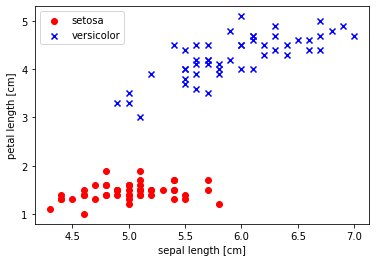

In [55]:
y = df.iloc[0:100, 4].values
# Iris-setosaを-1、Iris-versicolorを1に変換する
y = np.where(y == 'Iris-setosa', -1, 1)
# 萼片の長さ(1列目)と花弁の長さ(3連爪)を抽出
x = df.iloc[0:100, [0, 2]].values
plt.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', marker='x', label='versicolor')
# x軸ラベルの設定
plt.xlabel('sepal length [cm]')
# y軸ラベルの設定
plt.ylabel('petal length [cm]')
# 凡例の設定
plt.legend(loc='upper left')
# 図の表示
plt.show()

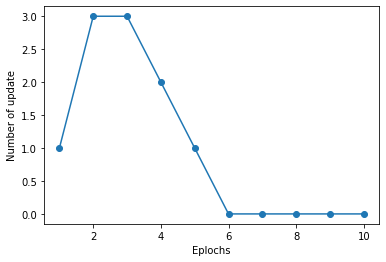

In [56]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(x, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Eplochs')
plt.ylabel('Number of update')
plt.show()

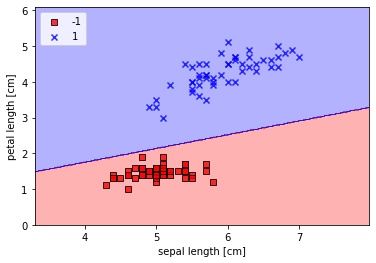

In [57]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(x, y, classifier, resolution=0.02):
  markers = ('s', 'x', 'o', '^', 'v')
  colors = ('red', 'blue', 'lightgreen ', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # 決定領域のプロット
  x1_main, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
  x2_main, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
  # グリッドポイントのプロット
  xx1, xx2 = np.meshgrid(np.arange(x1_main, x1_max, resolution),
                         np.arange(x2_main, x2_max, resolution))
  # 各特微量を1次元配列に変換して予測を実行
  z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  # 予測結果を元にグリッドポイントのデータサイズに変換
  z = z.reshape(xx1.shape)
  # グリッドポイントの等高線のプロット
  plt.contourf(xx1, xx2, z, alpha=0.3, cmap=cmap)
  # 軸の範囲設定
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # クラスごとにプロット
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=x[y == cl, 0],
                y=x[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')
    
# 決定領域のプロット
plot_decision_regions(x, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [0]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        """
        
        :param eta: 学習率=rate (0.0 < rate <= 1.0)
        :param n_iter: トレーニングデータのトレニング回数
        :param random_state: 重みを初期化するための乱数シード
        """
        self.random_state = random_state
        self.n_iter = n_iter
        self.eta = eta

    def fit(self, x, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + x.shape[1])
        self.cost_ = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(x)
            output = self.activation(net_input)
            errors = (y - output)
            
            self.w_[1:] += self.eta * x.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
            
        return self
    
    def net_input(self, x):
        return np.dot(x, self.w_[1:]) + self.w_[0]
    
    def activation(self, x):
        return x
    
    def predict(self, x):
        return np.where(self.activation(self.net_input(x)) >= 0.0, 1, -1)
    

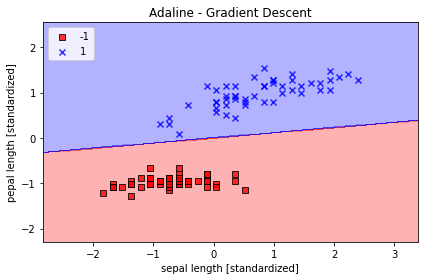

In [59]:
x_std = np.copy(x)
x_std[:, 0] = (x[:, 0] - x[:, 0].mean()) / x[:, 0].std()
x_std[:, 1] = (x[:, 1] - x[:, 1].mean()) / x[:, 1].std()

ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(x_std, y)

plot_decision_regions(x_std, y, classifier=ada)

plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('pepal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

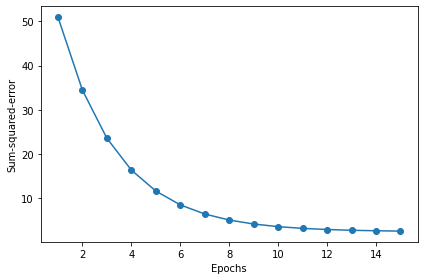

In [60]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.tight_layout()
plt.show()